In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import skmob
from skmob import preprocessing

In [7]:
path = 'filter1_malioboro_des.csv'
df = pd.read_csv(path)
df = df.drop({'Unnamed: 0'},axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149307 entries, 0 to 149306
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            149307 non-null  object 
 1   latitude        149307 non-null  float64
 2   longitude       149307 non-null  float64
 3   datetime_wib    149307 non-null  object 
 4   geometry        149307 non-null  object 
 5   Kelurahan/Desa  149307 non-null  object 
 6   Kecamatan       149307 non-null  object 
 7   Kabupaten       149307 non-null  object 
 8   tanggal         149307 non-null  object 
dtypes: float64(2), object(7)
memory usage: 10.3+ MB


maid  latitude   longitude  \
0  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
1  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
2  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
3  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
4  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   

          datetime_wib                              geometry  \
0  2021-12-01 00:00:35  POINT (110.36560821533205 -7.794847)   
1  2021-12-01 00:01:24   POINT (110.3659439086914 -7.794029)   
2  2021-12-01 00:01:24   POINT (110.3659439086914 -7.794029)   
3  2021-12-01 00:01:27  POINT (110.36560821533205 -7.794847)   
4  2021-12-01 00:01:27  POINT (110.36560821533205 -7.794847)   

          Kelurahan/Desa  Kecamatan        Kabupaten     tanggal  
0  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
1  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
2  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
3  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
4  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01

## Remove N/A and duplicate value

In [8]:
df.dropna(inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149307 entries, 0 to 149306
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            149307 non-null  object 
 1   latitude        149307 non-null  float64
 2   longitude       149307 non-null  float64
 3   datetime_wib    149307 non-null  object 
 4   geometry        149307 non-null  object 
 5   Kelurahan/Desa  149307 non-null  object 
 6   Kecamatan       149307 non-null  object 
 7   Kabupaten       149307 non-null  object 
 8   tanggal         149307 non-null  object 
dtypes: float64(2), object(7)
memory usage: 10.3+ MB


maid  latitude   longitude  \
0  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
1  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
2  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
3  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
4  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   

          datetime_wib                              geometry  \
0  2021-12-01 00:00:35  POINT (110.36560821533205 -7.794847)   
1  2021-12-01 00:01:24   POINT (110.3659439086914 -7.794029)   
2  2021-12-01 00:01:24   POINT (110.3659439086914 -7.794029)   
3  2021-12-01 00:01:27  POINT (110.36560821533205 -7.794847)   
4  2021-12-01 00:01:27  POINT (110.36560821533205 -7.794847)   

          Kelurahan/Desa  Kecamatan        Kabupaten     tanggal  
0  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
1  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
2  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
3  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
4  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01

In [9]:
df = df.drop_duplicates()
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80329 entries, 0 to 149306
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   maid            80329 non-null  object 
 1   latitude        80329 non-null  float64
 2   longitude       80329 non-null  float64
 3   datetime_wib    80329 non-null  object 
 4   geometry        80329 non-null  object 
 5   Kelurahan/Desa  80329 non-null  object 
 6   Kecamatan       80329 non-null  object 
 7   Kabupaten       80329 non-null  object 
 8   tanggal         80329 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.1+ MB


maid  latitude   longitude  \
0  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
1  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
3  d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
5  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
6  3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   

          datetime_wib                              geometry  \
0  2021-12-01 00:00:35  POINT (110.36560821533205 -7.794847)   
1  2021-12-01 00:01:24   POINT (110.3659439086914 -7.794029)   
3  2021-12-01 00:01:27  POINT (110.36560821533205 -7.794847)   
5  2021-12-01 00:02:55   POINT (110.3659439086914 -7.794029)   
6  2021-12-01 00:03:00   POINT (110.3659439086914 -7.794029)   

          Kelurahan/Desa  Kecamatan        Kabupaten     tanggal  
0  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
1  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
3  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
5  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01  
6  Kelurahan Suryatmajan  Danurejan  Kota Yogyakarta  2021-12-01

In [10]:
# df[df["maid"] == '375bc2e5-1e09-4620-a780-c75d5a6aeb69'].sort_values("datetime_wib").tail(50)

In [11]:
def bar_chart(data):
    filtered_data = data.copy()

    # Hapus duplikat 'maid' berdasarkan tanggal
    filtered_data_unique_maid = filtered_data.drop_duplicates(subset=['tanggal', 'maid'])

    # Hitung jumlah unik per hari
    jumlah_unik_per_hari = filtered_data_unique_maid.groupby('tanggal').size()

    print(filtered_data.nunique())

    # Plotting
    plt.figure(figsize=(10, 6))
    jumlah_unik_per_hari.plot(kind='bar', color='skyblue')
    plt.title('Jumlah Data Maid unik per Hari')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Data Unik')
    plt.xticks(rotation=75)
    plt.show()

maid               9402
latitude           6469
longitude           811
datetime_wib      43375
geometry          26458
Kelurahan/Desa        5
Kecamatan             4
Kabupaten             1
tanggal              31
dtype: int64


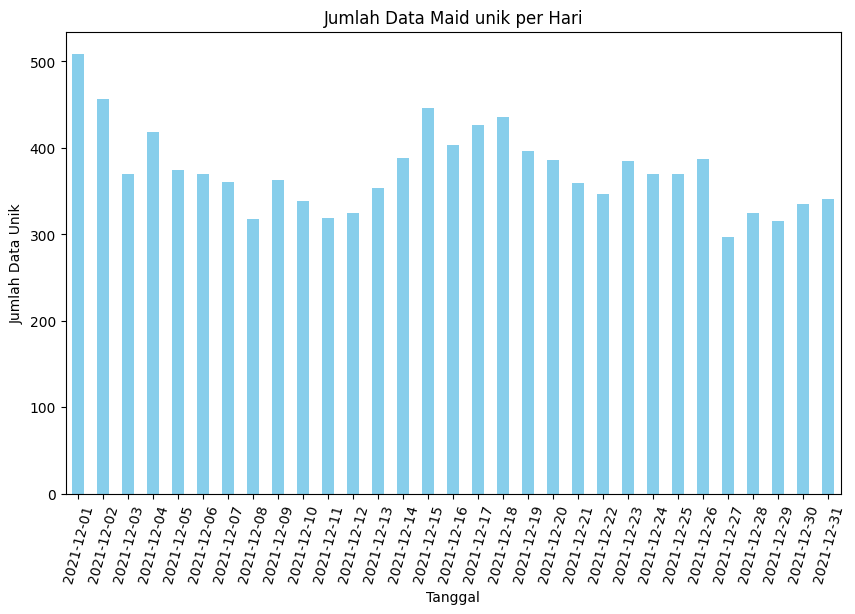

In [12]:
bar_chart(df)

## Set minimum threshold of user ID occurence to 10

In [16]:
ids = df['maid'].value_counts()
ids

9a63fd0e-d363-478a-8136-99b1eb82693f    7667
f501c8a1-e251-4b8c-87fc-9a1a26d2e19d    6771
6065d08e-1b9a-45ed-9042-fc0773b25d3a    2873
a2b6a27a-35e9-4735-909b-6cfbafd288ac    1489
4a2de4fb-2878-41ae-bc12-2890dc0f62b8    1212
                                        ... 
754eced2-4a25-436c-a0c0-b10865f49300       1
1a382c38-2005-470d-a5ea-3762ec634ccd       1
9d415c94-115c-4f1d-87b9-12c7dd086eb5       1
f913c0a3-7058-4dff-983a-c60604643e44       1
e04db1db-f4e6-47de-9966-f9daf80acd79       1
Name: maid, Length: 9402, dtype: int64

In [21]:
# filtering to minimum 10 mobilities

valid_ids = ids[ids >= 2].index.tolist()
# filter dataframe to include only valid IDs
filtered_df = df[df['maid'].isin(valid_ids)]
filtered_df.shape

(76834, 9)

maid               5907
latitude           6324
longitude           807
datetime_wib      39958
geometry          26221
Kelurahan/Desa        5
Kecamatan             4
Kabupaten             1
tanggal              31
dtype: int64


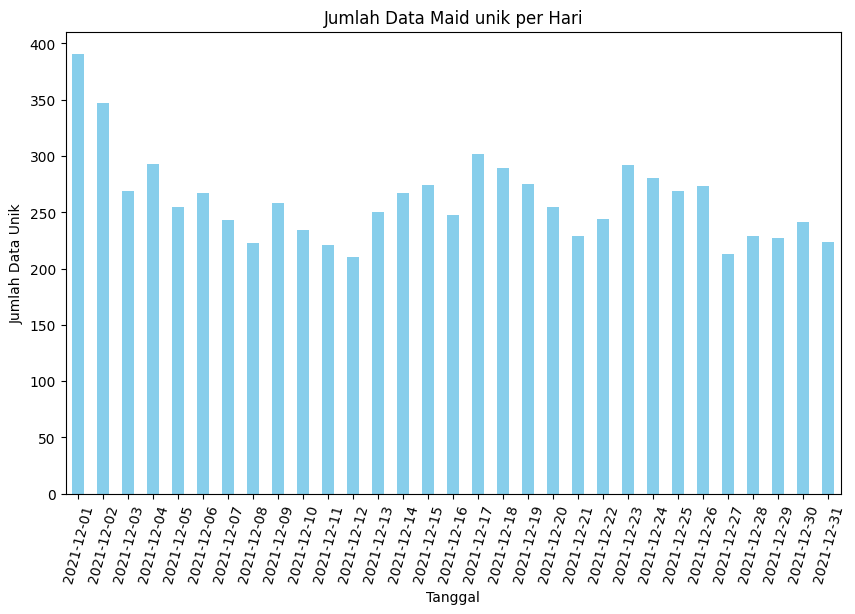

In [22]:
bar_chart(filtered_df)

In [11]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153054 entries, 0 to 527277
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   maid            153054 non-null  object 
 1   latitude        153054 non-null  float64
 2   longitude       153054 non-null  float64
 3   datetime_wib    153054 non-null  object 
 4   geometry        153054 non-null  object 
 5   Kelurahan/Desa  153054 non-null  object 
 6   Kecamatan       153054 non-null  object 
 7   Kabupaten       153054 non-null  object 
 8   tanggal         153054 non-null  object 
dtypes: float64(2), object(7)
memory usage: 11.7+ MB


## Filter with Scikit-mobility

In [39]:
df['datetime_wib'].astype(str)

0         2021-12-01 00:00:35
1         2021-12-01 00:01:24
3         2021-12-01 00:01:27
5         2021-12-01 00:02:55
6         2021-12-01 00:03:00
                 ...         
149300    2021-12-31 15:36:59
149302    2021-12-31 19:58:38
149303    2021-12-31 20:19:26
149305    2021-12-31 20:20:45
149306    2021-12-31 20:21:52
Name: datetime_wib, Length: 80329, dtype: object

In [41]:
tdf = skmob.TrajDataFrame(df, latitude='latitude', longitude='longitude', user_id='maid', datetime='datetime_wib')
# tdf.info()
# tdf.head()

In [42]:
tdf

uid       lat         lng  \
0       d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
1       3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
3       d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
5       3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
6       3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
...                                      ...       ...         ...   
149300  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801574  110.365330   
149302  4c2cb206-4092-424b-8390-3ab840073dac -7.802061  110.365898   
149303  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801594  110.365334   
149305  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801594  110.365334   
149306  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801594  110.365334   

                  datetime                               geometry  \
0      2021-12-01 00:00:35   POINT (110.36560821533205 -7.794847)   
1      2021-12-01 00:01:24    POINT (110.3659439086914 -7.794029)   
3      2021-12-01 00:01:27   POINT (110.36560821533205 -7.794847)   
5      2021-12-01 00:02:55    POINT (110.3659439086914 -7.794029)   
6      2021-12-01 00:03:00    POINT (110.3659439086914 -7.794029)   
...                    ...                                    ...   
149300 2021-12-31 15:36:59            POINT (110.36533 -7.801574)   
149302 2021-12-31 19:58:38  POINT (110.36589813232422 -7.8020606)   
149303 2021-12-31 20:19:26    POINT (110.3653335571289 -7.801594)   
149305 2021-12-31 20:20:45    POINT (110.3653335571289 -7.801594)   
149306 2021-12-31 20:21:52    POINT (110.3653335571289 -7.801594)   

                 Kelurahan/Desa   Kecamatan        Kabupaten     tanggal  
0         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
1         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
3         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
5         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
6         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
...                         ...         ...              ...         ...  
149300  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149302  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149303  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149305  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149306  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  

[80329 rows x 9 columns]

## Noise filtering

In [43]:
ftdf = preprocessing.filtering.filter(tdf, max_speed_kmh=500.)
print('Number of points before: %d' %len(tdf))
print('Number of points after: %d\n' %(len(ftdf)))
ftdf.head()

Number of points in ftdf: 46576
Number of filtered points: 33753



uid       lat         lng  \
0  00012afc-6daf-461f-96a8-181e5af69db9 -7.800291  110.364998   
1  00012afc-6daf-461f-96a8-181e5af69db9 -7.800291  110.364998   
2  00012afc-6daf-461f-96a8-181e5af69db9 -7.800300  110.364998   
3  00012afc-6daf-461f-96a8-181e5af69db9 -7.801375  110.365013   
4  0001fc56-b8b4-4798-ba18-dc80ad8fb0d8 -7.801390  110.364998   

             datetime                              geometry  \
0 2021-12-01 17:54:11  POINT (110.36499786376952 -7.800291)   
1 2021-12-01 17:54:12  POINT (110.36499786376952 -7.800291)   
2 2021-12-01 17:54:22    POINT (110.36499786376952 -7.8003)   
3 2021-12-01 19:22:04   POINT (110.3650131225586 -7.801375)   
4 2021-12-18 21:32:22   POINT (110.36499786376952 -7.80139)   

       Kelurahan/Desa   Kecamatan        Kabupaten     tanggal  
0  Kelurahan Ngupasan  Gondomanan  Kota Yogyakarta  2021-12-01  
1  Kelurahan Ngupasan  Gondomanan  Kota Yogyakarta  2021-12-01  
2  Kelurahan Ngupasan  Gondomanan  Kota Yogyakarta  2021-12-01  
3  Kelurahan Ngupasan  Gondomanan  Kota Yogyakarta  2021-12-01  
4  Kelurahan Ngupasan  Gondomanan  Kota Yogyakarta  2021-12-18

In [49]:
tdf

uid       lat         lng  \
0       d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
1       3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
3       d60a2068-d7ea-48a7-a363-e3e7e0bd02cb -7.794847  110.365608   
5       3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
6       3ad1fad6-400a-4ae9-8610-c2d355dcd9f9 -7.794029  110.365944   
...                                      ...       ...         ...   
149300  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801574  110.365330   
149302  4c2cb206-4092-424b-8390-3ab840073dac -7.802061  110.365898   
149303  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801594  110.365334   
149305  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801594  110.365334   
149306  69bd9b43-0ebd-4c6c-b393-1809c823411c -7.801594  110.365334   

                  datetime                               geometry  \
0      2021-12-01 00:00:35   POINT (110.36560821533205 -7.794847)   
1      2021-12-01 00:01:24    POINT (110.3659439086914 -7.794029)   
3      2021-12-01 00:01:27   POINT (110.36560821533205 -7.794847)   
5      2021-12-01 00:02:55    POINT (110.3659439086914 -7.794029)   
6      2021-12-01 00:03:00    POINT (110.3659439086914 -7.794029)   
...                    ...                                    ...   
149300 2021-12-31 15:36:59            POINT (110.36533 -7.801574)   
149302 2021-12-31 19:58:38  POINT (110.36589813232422 -7.8020606)   
149303 2021-12-31 20:19:26    POINT (110.3653335571289 -7.801594)   
149305 2021-12-31 20:20:45    POINT (110.3653335571289 -7.801594)   
149306 2021-12-31 20:21:52    POINT (110.3653335571289 -7.801594)   

                 Kelurahan/Desa   Kecamatan        Kabupaten     tanggal  
0         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
1         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
3         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
5         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
6         Kelurahan Suryatmajan   Danurejan  Kota Yogyakarta  2021-12-01  
...                         ...         ...              ...         ...  
149300  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149302  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149303  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149305  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  
149306  Kelurahan Prawirodirjan  Gondomanan  Kota Yogyakarta  2021-12-31  

[80329 rows x 9 columns]